In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import csv
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

In [2]:
#import csv files
path = '../data_files/processed/new_model.csv'
data = pd.read_csv(path,sep = "\t")
data.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80,1.020,1,0,1,36.0,1.2,137.53,4.63,15.4,7800,5.20,1.0,1
1,50,1.020,4,0,1,18.0,0.8,137.53,4.63,11.3,6000,4.71,0.0,1
2,80,1.010,2,3,1,53.0,1.8,137.53,4.63,9.6,7500,4.71,0.0,1
3,70,1.005,4,0,1,56.0,3.8,111.00,2.50,11.2,6700,3.90,1.0,1
4,80,1.010,2,0,1,26.0,1.4,137.53,4.63,11.6,7300,4.60,0.0,1


In [3]:
data.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


<Axes: >

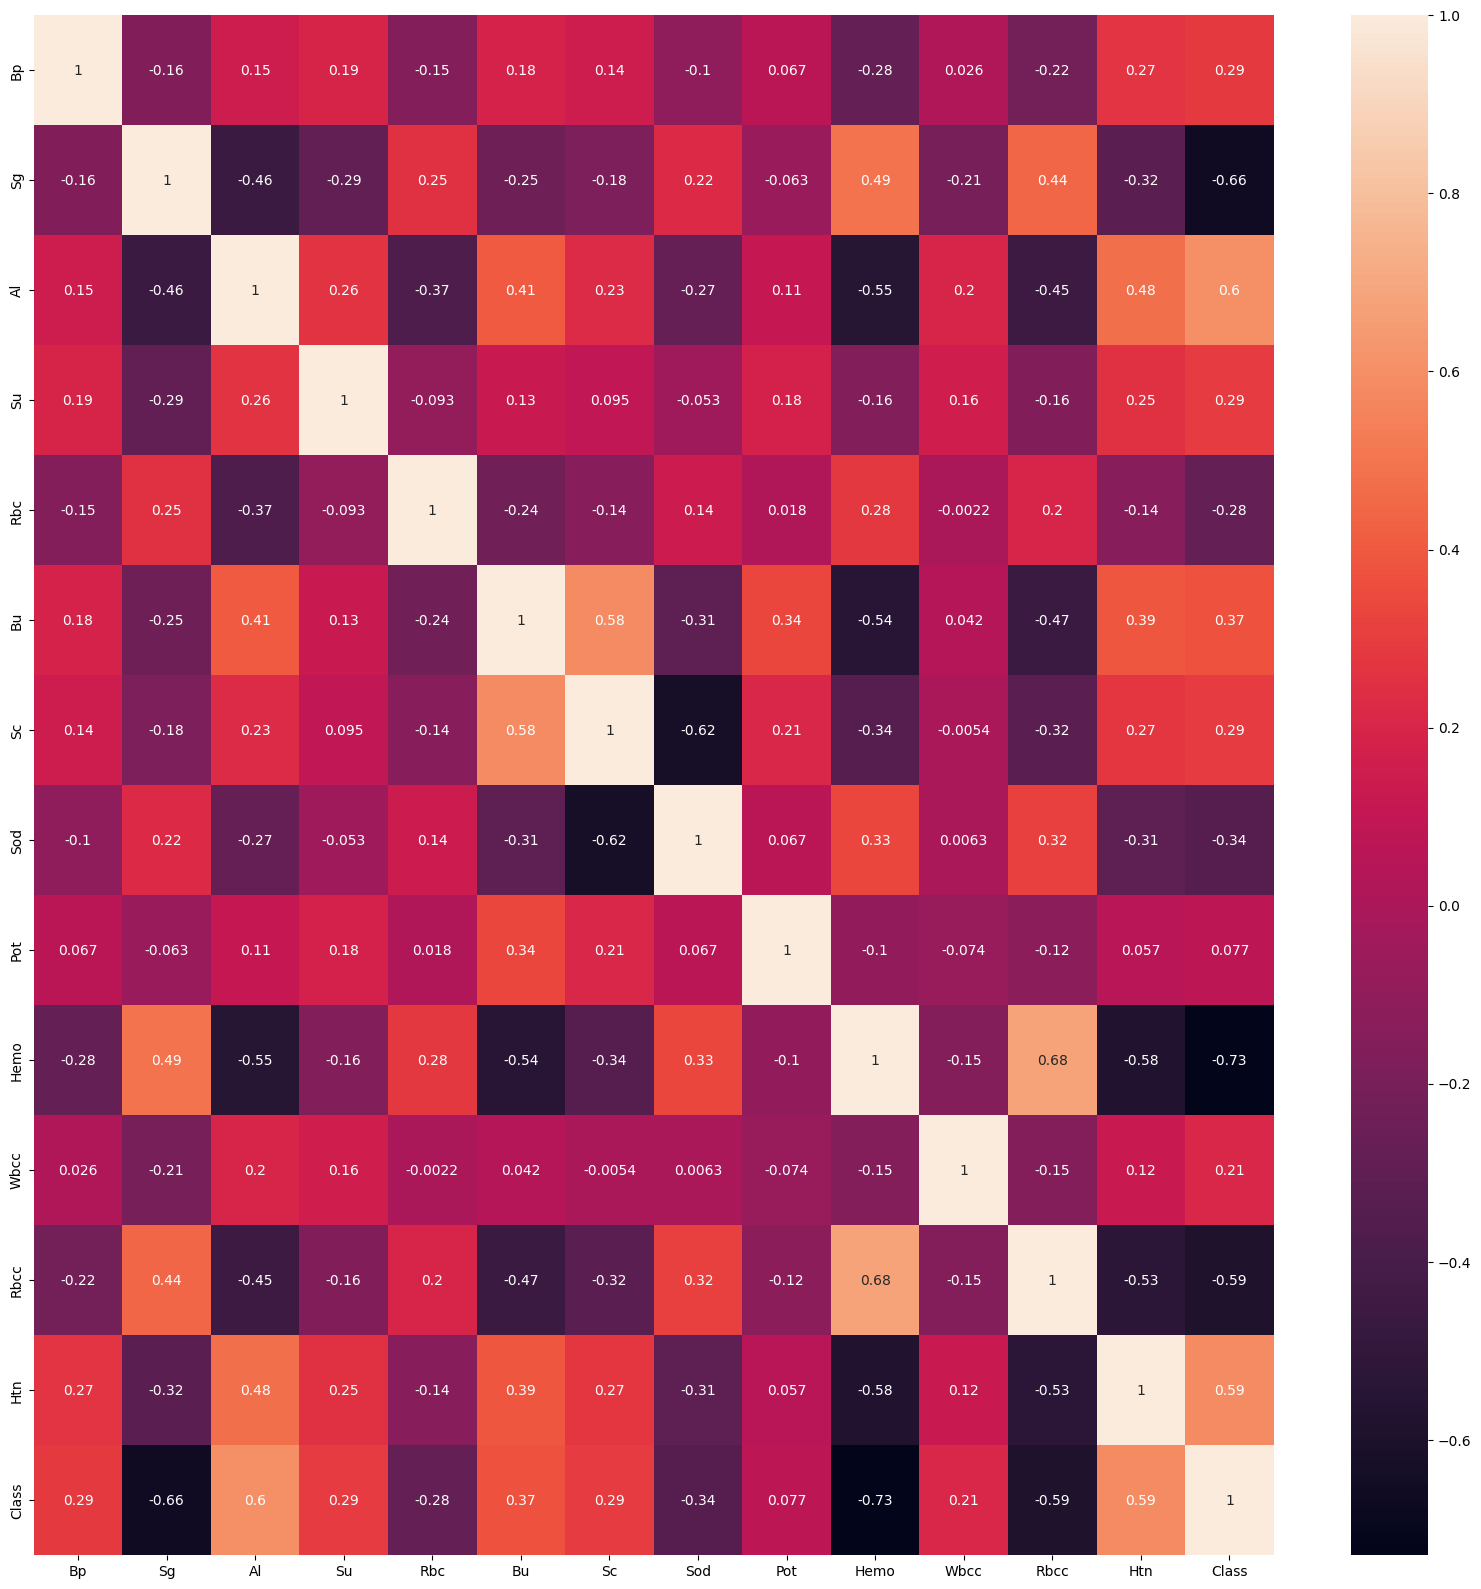

In [29]:
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr,annot=True)

In [4]:
# split data X and y
x = data.drop(['Class'],axis=1)
y = data['Class']
lab_enc=LabelEncoder()
y=lab_enc.fit_transform(y)

Text(0.5, 1.0, 'Counts of each Classification Category')

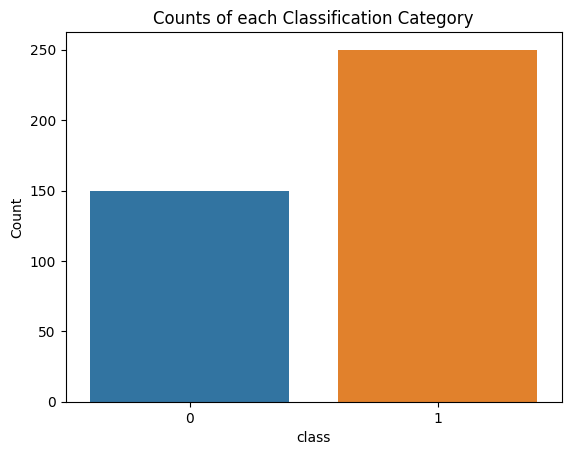

In [33]:
# Calculate the value counts of the 'classification' column
classification_counts = data['Class'].value_counts()

# Create the bar plot
sns.barplot(x=classification_counts.index, y=classification_counts)

# Set plot labels
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Counts of each Classification Category')

# Train Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Random Forest Classifier

In [6]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,Y_train)

y_predi=clf.predict(X_test)

In [7]:
AccR=accuracy_score(Y_test, y_predi)

In [8]:
print(AccR)

1.0


## Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
knn_sc=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=15)
    knn_sc.append(score.mean())

Text(0.5, 1.0, 'k neighbour scores')

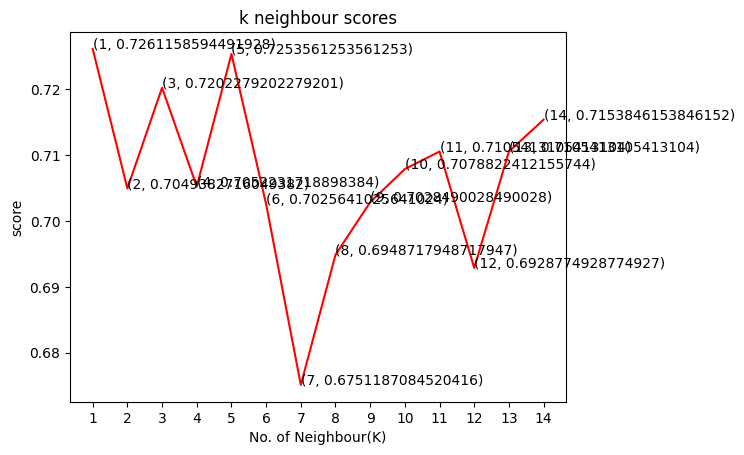

In [10]:
plt.plot([k for k in range(1,15)],knn_sc,color='red')
for i in range(1,15):
    plt.text(i,knn_sc[i-1],(i,knn_sc[i-1]))
plt.xticks([i for i in range(1,15)])
plt.xlabel("No. of Neighbour(K)")
plt.ylabel("score")
plt.title('k neighbour scores')

## KNN classifier

In [11]:

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, Y_train)

    #Predict the response for test dataset
y_pred = knn.predict(X_test)

In [12]:
AccK=accuracy_score(Y_test, y_pred)

In [13]:
print(AccK)

0.75


## Decision Tree Classifier

In [14]:
model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(X_train,Y_train)
# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 5


In [15]:
y_predi=model.predict(X_test)

In [16]:
AccD=accuracy_score(Y_test, y_predi)

In [17]:
print(AccD)

0.9666666666666667


## Plot Decison Tree

[Text(0.6153846153846154, 0.9166666666666666, 'x[9] <= 12.9\ngini = 0.459\nsamples = 280\nvalue = [100, 180]'),
 Text(0.46153846153846156, 0.75, 'x[6] <= 1.15\ngini = 0.046\nsamples = 168\nvalue = [4, 164]'),
 Text(0.38461538461538464, 0.5833333333333334, 'x[5] <= 31.5\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[5] <= 15.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.15384615384615385, 0.25, 'x[0] <= 70.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.5384615384615384, 0.4166666666666667, 'x[1] <= 1.015\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.46153846153846156, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6153846153846154, 0.25, 'gini =

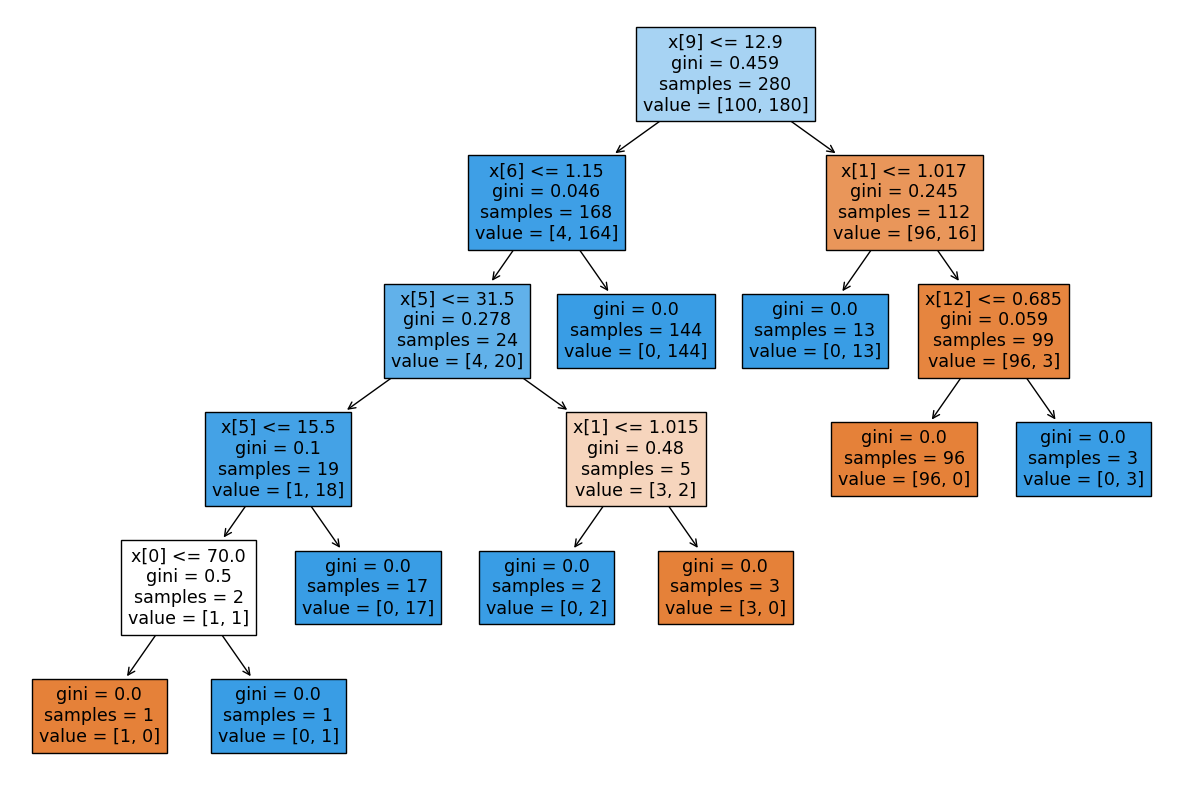

In [19]:
from  sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

## Naive Baye's Algorithm

In [20]:
Nb = GaussianNB()

#Train the model using the training sets
Nb.fit(X_train,Y_train)

#prediction
prediction=Nb.predict(X_test)

In [21]:
AccNB=accuracy_score(Y_test, prediction)

In [22]:
print(AccNB)

0.9166666666666666


In [23]:
newdf = pd.DataFrame({'RandomForest': AccR*100.0, 'DecisionTree':AccD*100.0,'Knn': AccK*100.0, 'NaiveBayes':AccNB*100.0},index=[0])

In [24]:
newdf

,RandomForest,DecisionTree,Knn,NaiveBayes
0,100.0,96.666667,75.0,91.666667


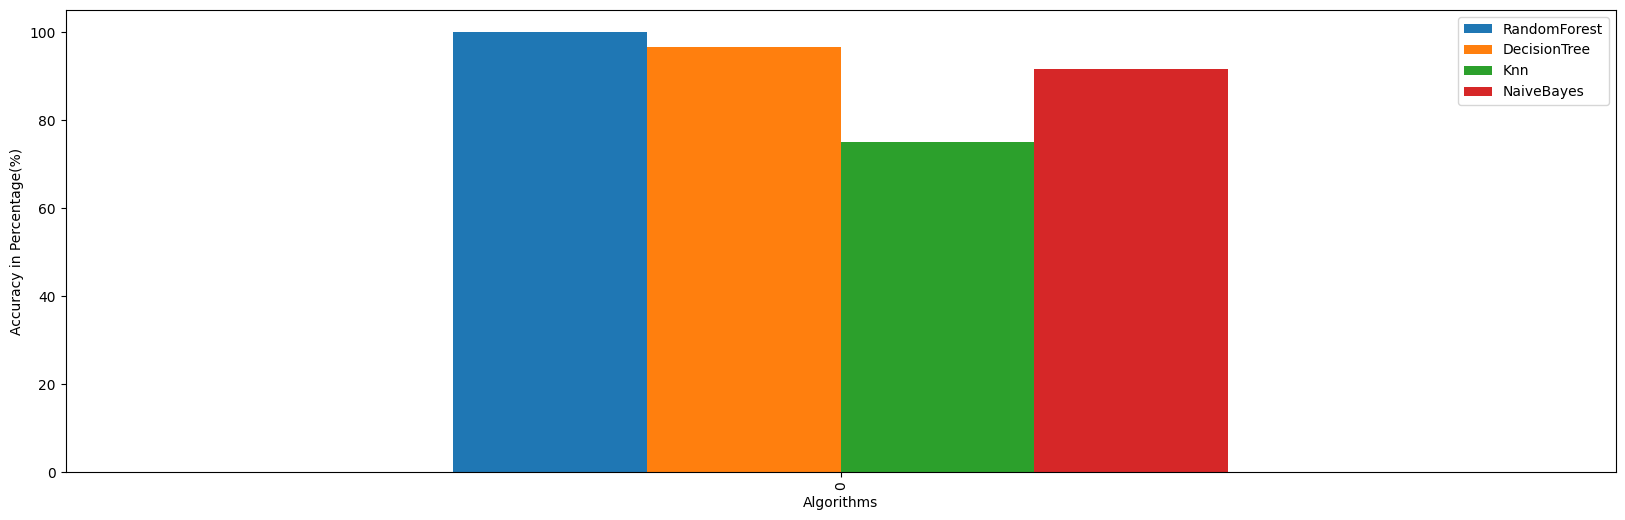

In [25]:
df1 = newdf
df1.plot(kind='bar',figsize=(20,6))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy in Percentage(%)')
plt.show()

In [26]:
import seaborn as sns

<Axes: >

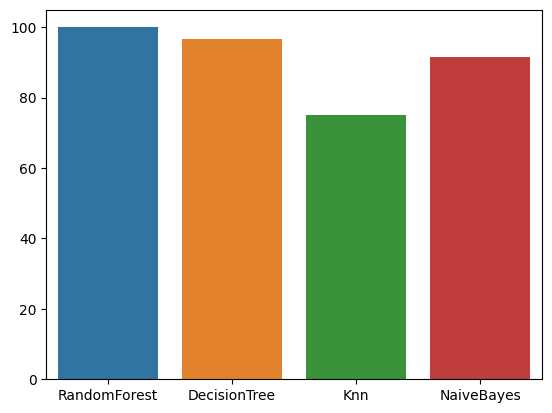

In [27]:
sns.barplot(data=df1)

## Save in Pickle file

In [33]:
import pickle

file_name = 'RF_classifier.pkl'
pickle.dump(clf,open(file_name,'wb'))

In [43]:
loaded_model = pickle.load(open(file_name,'rb'))
loaded_model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0])